In [1]:
# import stuff
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
import sklearn as sk
import SingleCellSimNMF as scnmf 


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# pick session
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:30<04:01, 30.17s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [01:54<05:23, 46.27s/it]

replicate 0
replicate 1
replicate 2


 33%|████████████████████████████                                                        | 3/9 [04:27<07:51, 78.57s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████▉                                              | 4/9 [08:07<10:04, 120.88s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [12:30<10:54, 163.60s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [17:21<10:05, 201.76s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [22:52<08:01, 240.56s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [28:27<04:28, 268.91s/it]

replicate 0
replicate 1
replicate 2


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [34:43<00:00, 300.86s/it]


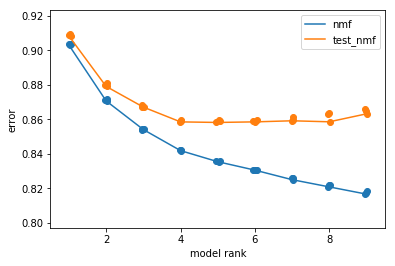

In [4]:
mouse = '4139265.5'
date = '19_02_2019'
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

In [80]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_rmse.pdf'),format='pdf')

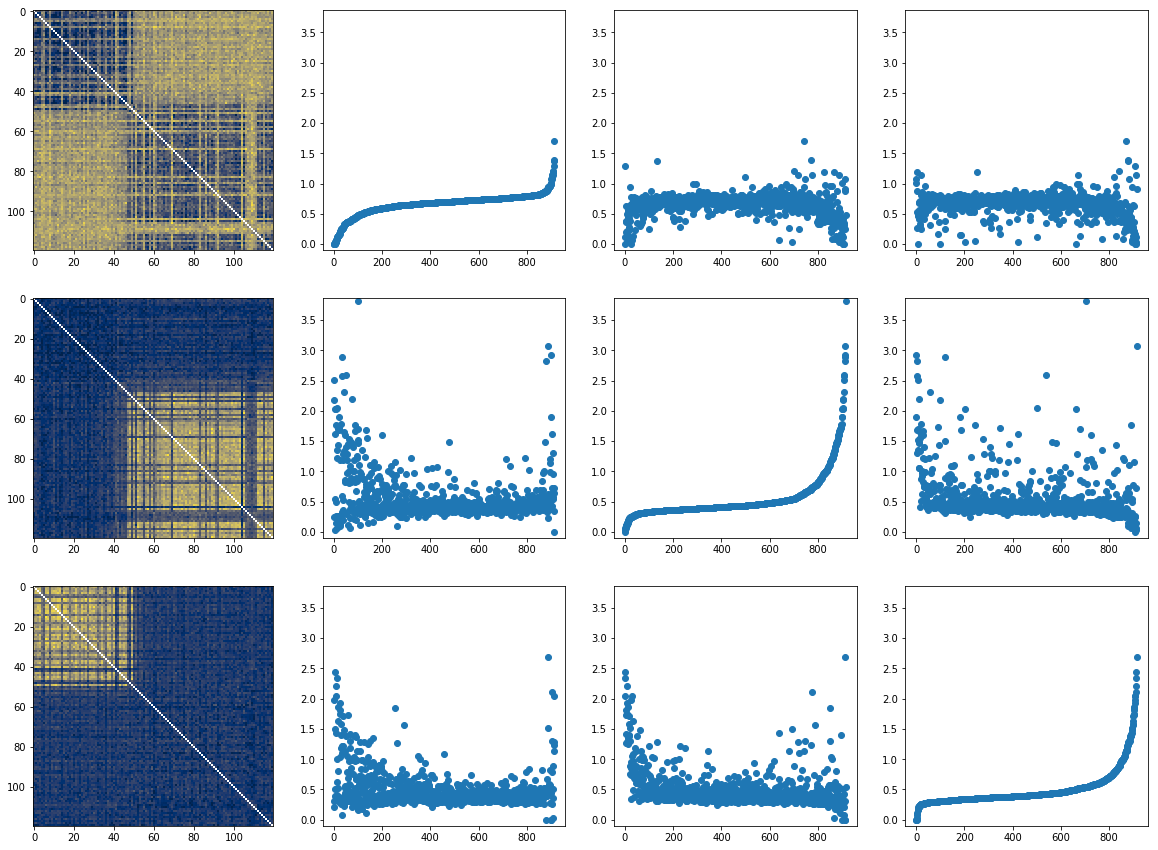

In [9]:
f,ax = scnmf.plot_factors(results,3,120)
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'4139265.5_19_02_2019_cellnmf_3factors.pdf'),format='pdf')

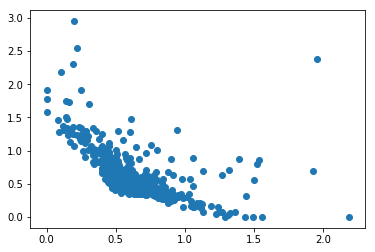

In [82]:
W = results[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_weights_scatter.pdf'),format='pdf')

num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:24<03:15, 24.46s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [01:28<04:13, 36.23s/it]

replicate 0
replicate 1
replicate 2


 33%|████████████████████████████                                                        | 3/9 [03:08<05:32, 55.43s/it]

replicate 0
replicate 1
replicate 2


 44%|█████████████████████████████████████▎                                              | 4/9 [05:40<07:01, 84.37s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [08:10<06:56, 104.23s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [11:24<06:32, 130.97s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [14:37<04:59, 149.73s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [18:52<03:01, 181.20s/it]

replicate 0
replicate 1
replicate 2


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [23:31<00:00, 210.64s/it]


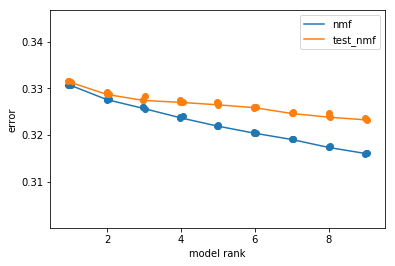

In [10]:

mouse = '4222153.2'
date = '18_04_2019';
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

In [11]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_rmse.pdf'),format='pdf')

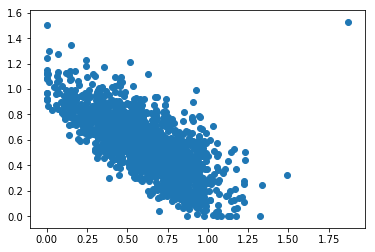

In [12]:
f,ax = plt.subplots()
W = results[2]['factors'][0][0]
ax.scatter(W[:,0],W[:,1])
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_weights_scatter.pdf'),format='pdf')

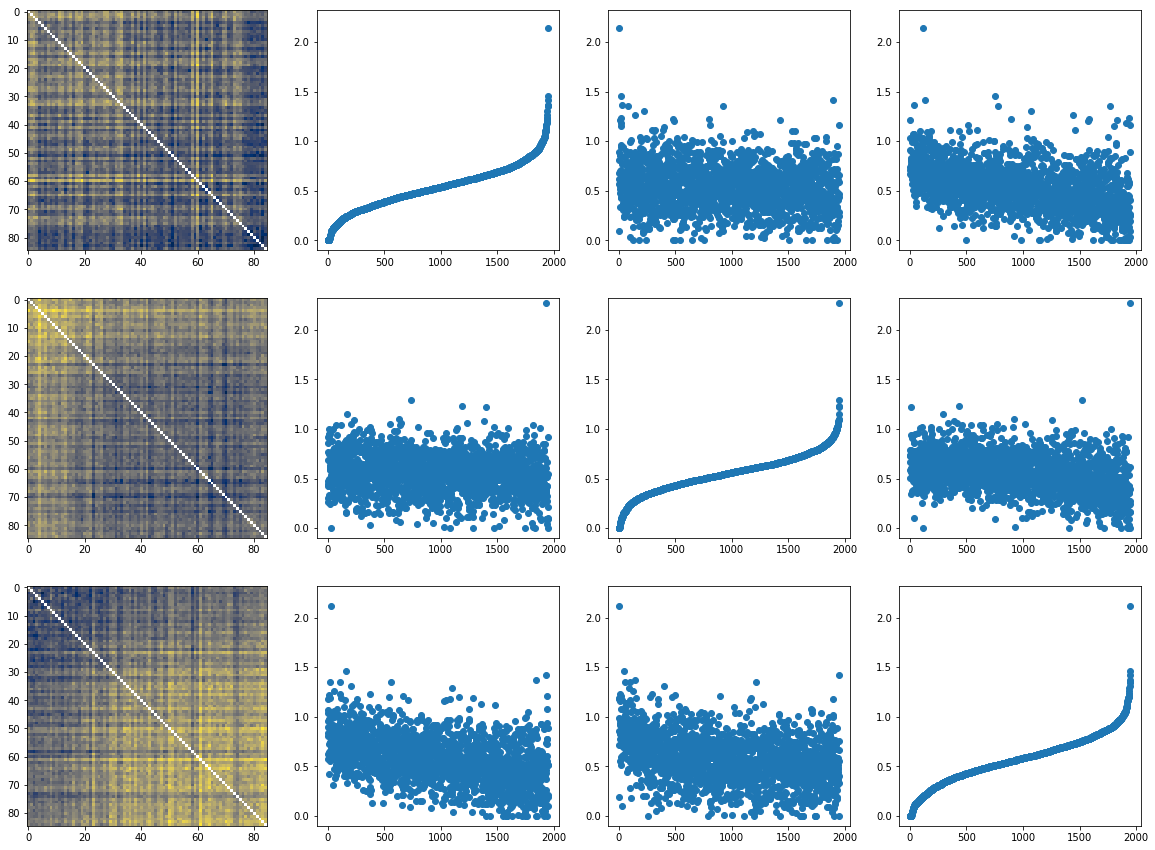

In [18]:
f,ax = scnmf.plot_factors(results,3,em.shape[0],downsample=1.)

In [15]:
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'4222153.2_18_04_2019_cellnmf_3factors.pdf'),format='pdf')

4139265.3
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
4139265.4
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\PlaceCellAnalyses\SingleCellSimNMF.py:36: RuntimeWarning: invalid value encountered in true_divide
  S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]


num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
4139265.5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0
num aberrant ttls 0.0
36018 (36018,) (36018, 21) 118606
frame diff 0
num aberrant ttls 0.0
40272 (40272,) (40272, 21) 133982
frame diff 0
num aberrant ttls 0.0
36659 (36659,) (36659, 21) 120387
frame diff 0
num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384
frame diff 0


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:57<07:40, 57.51s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [04:12<11:30, 98.61s/it]

replicate 0
replicate 1
replicate 2


 33%|███████████████████████████▋                                                       | 3/9 [08:07<13:58, 139.80s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████▉                                              | 4/9 [13:15<15:50, 190.05s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [19:46<16:41, 250.27s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [26:22<14:42, 294.26s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [33:34<11:10, 335.37s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [41:08<06:10, 370.90s/it]

replicate 0
replicate 1
replicate 2


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [49:43<00:00, 414.39s/it]


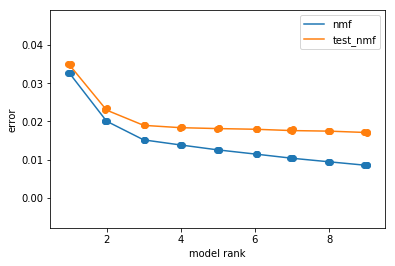

In [19]:
cellmat_rare = scnmf.build_matrix(df,['4139265.3','4139265.4','4139265.5'])
results_rare,fig_rare = scnmf.run_ensemble(cellmat_rare)


In [51]:
fig_rare[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'rare_cellnmf_rmse.pdf'),format='pdf')

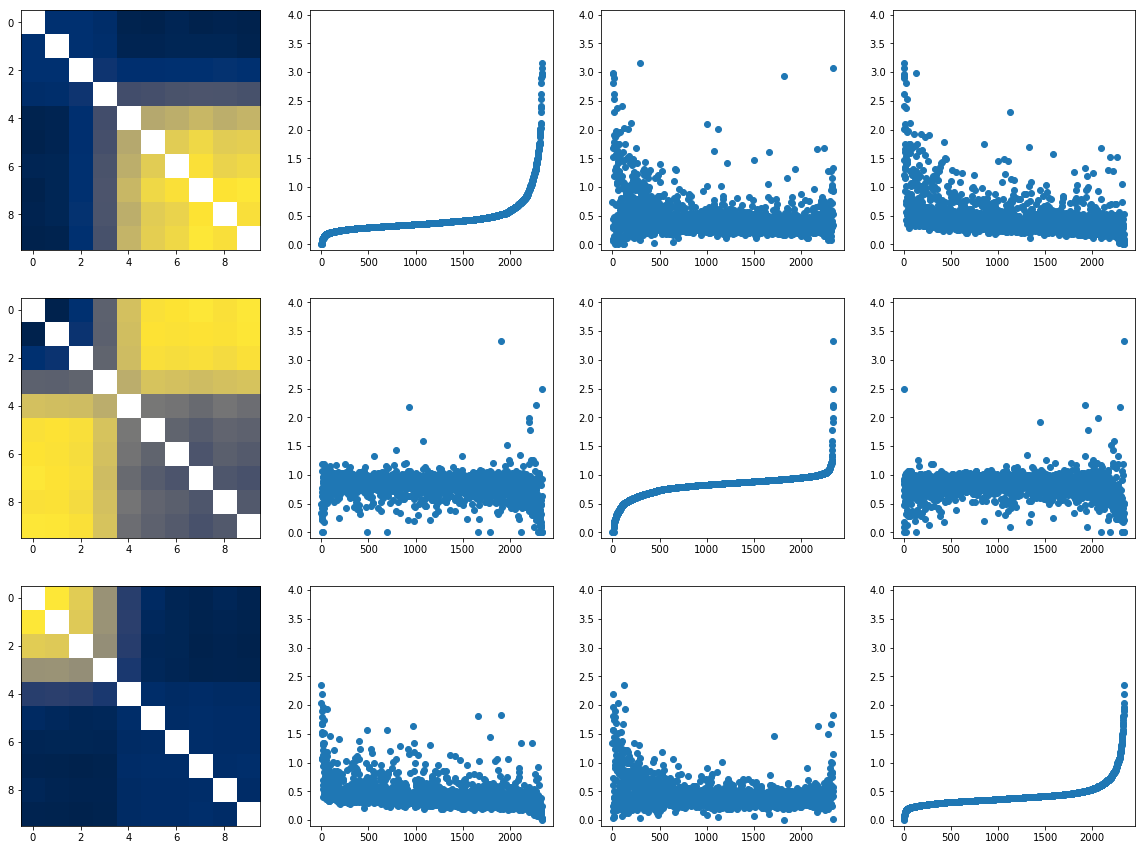

In [20]:
f_factors_rare,ax_factors_rare = scnmf.plot_factors(results_rare,3,10,downsample=.1)

In [21]:
f_factors_rare.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'rare_cellnmf_3factors.pdf'),format='pdf')

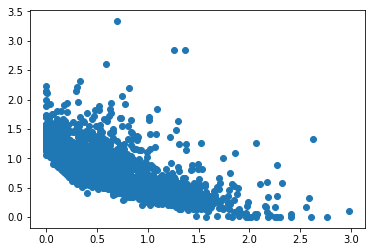

In [75]:
W = results_rare[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'rare_cellnmf_weights_scatter.pdf'),format='pdf')

4222153.2
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
frame diff 0
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
frame diff 0
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
frame diff 0
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0
4222153.1
num aberrant ttls 0.0
36036 (36036,) (36036, 21) 118455
frame diff 0
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
frame diff 0
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
frame diff 0
4222153.3
num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
frame diff 0
4222174.1
num aberrant ttls 0.0
29526 (29526,) (29526, 21) 83238
frame diff 0
num aberrant ttls 0.0
34560 (34560,) (34560, 21) 97310
frame diff 0
num aberrant ttls 0.0
30879 (30879,) (30879, 21) 86531
frame diff 0
num aberrant ttls 0.0
28286 (28286,) (28286, 21) 80945
frame diff 0
num aberrant ttls 0.0
31882 (31882,) (31882, 21) 91565
frame diff 0


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:49<06:36, 49.50s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [03:31<09:43, 83.34s/it]

replicate 0
replicate 1
replicate 2


 33%|███████████████████████████▋                                                       | 3/9 [06:59<12:03, 120.59s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████▉                                              | 4/9 [10:43<12:37, 151.55s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [15:18<12:35, 188.85s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [20:44<11:29, 229.83s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [25:40<08:19, 249.59s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [31:46<04:44, 284.73s/it]

replicate 0
replicate 1
replicate 2


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [38:07<00:00, 313.48s/it]


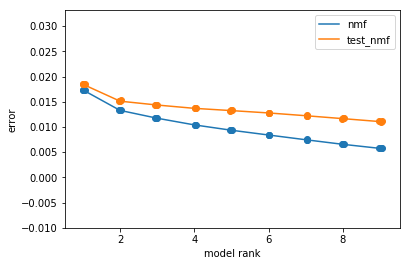

In [22]:

cellmat_fam = scnmf.build_matrix(df,['4222153.2','4222153.1','4222153.3','4222174.1'],first_sess=4)
results_fam,fig_fam = scnmf.run_ensemble(cellmat_fam)

In [62]:
fig_fam[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'fam_cellnmf_rmse.pdf'),format='pdf')

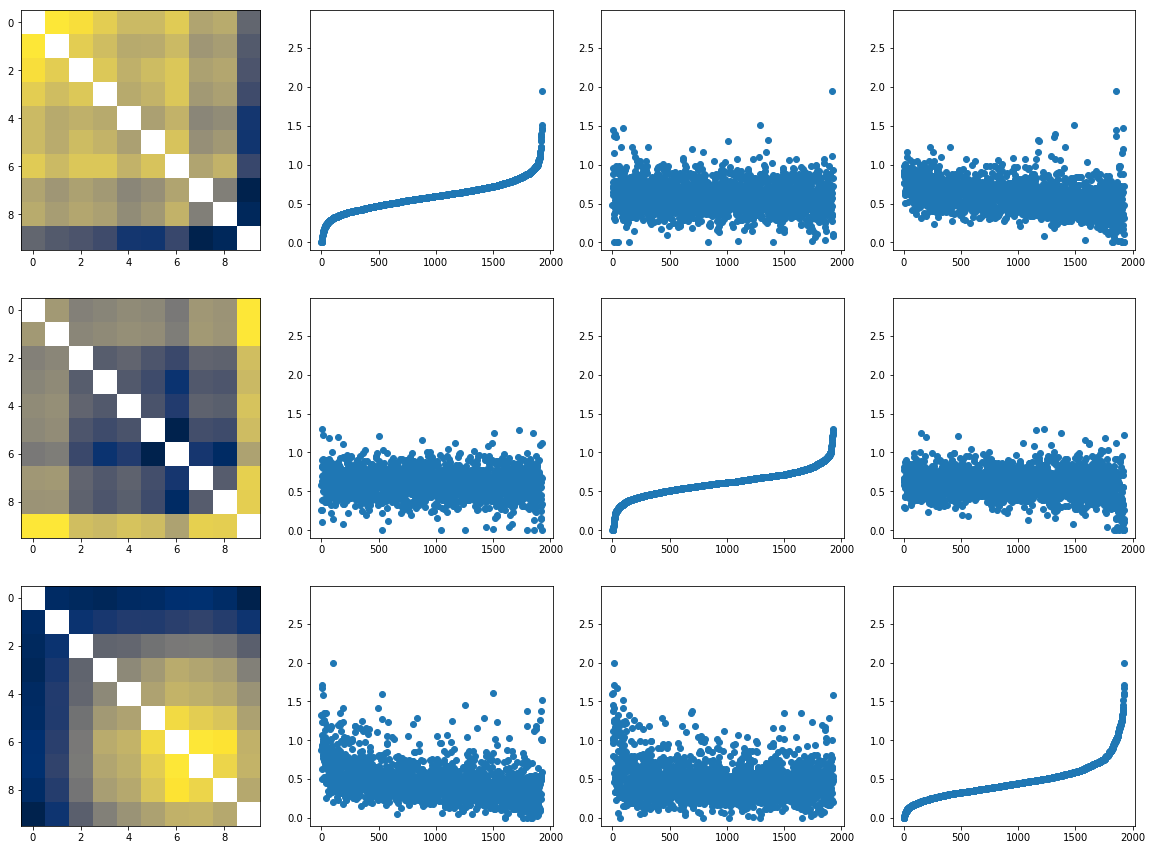

In [27]:
f_factors_fam,ax_factors_fam = scnmf.plot_factors(results_fam,3,10,downsample=.1)

In [25]:
f_factors_fam.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'fam_cellnmf_3factors.pdf'),format='pdf')

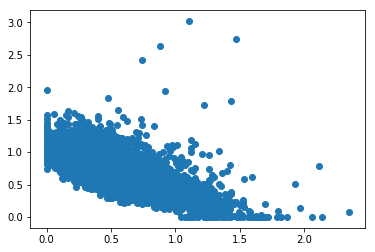

In [76]:
W = results_fam[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'fam_cellnmf_weights_scatter.pdf'),format='pdf')